# Pandas basics

Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

This is a review of Pandas' Basics with an emphasis on using groupby.

## Imports 

In [1]:
# python standard library
import os

# from pypi
import pandas
import numpy
import matplotlib.pyplot as pyplot
import seaborn

from tabulate import tabulate #to install: conda install -c conda-forge tabulate

## Confirmed
These are values that we know to be correct so you can use them to check the outcomes.

In [66]:
class Confirmed:
    """This holds confirmed values"""
    september_max_revenue = 7982852.199999956
    september_max_category_id = 20
    number_of_items_whose_price_didnt_change = 5926
    variance_per_day = 117167.70229885059

## The Data

We have four data-sets to load, all of them in csv format, although the file with all the transactions is compressed.

In [2]:
transactions    = pandas.read_csv('sales_train.csv.gz')
items           = pandas.read_csv('items.csv')
item_categories = pandas.read_csv('item_categories.csv')
shops           = pandas.read_csv('shops.csv')

The frames dictionary is just a convenience thing to make printing the descriptive tables below a little easier.

In [3]:
frames = dict(transactions=transactions,
    items=items,
    item_categories=item_categories,
    shops=shops)

## Data Description

### File descriptions 

File Name	            Description
sales_train.csv	        the training set. Daily historical data from January 2013 to October 2015.
test.csv	            the test set. You need to forecast the sales for these shops and products for November 2015.
sample_submission.csv	a sample submission file in the correct format.
items.csv	            supplemental information about the items/products.
item_categories.csv	    supplemental information about the items categories.
shops.csv	            supplemental information about the shops.

### Data Fields

Data Fields
Column              Description
ID                  an Id that represents a (Shop, Item) tuple within the test set
shop_id             unique identifier of a shop
item_id             unique identifier of a product
item_category_id    unique identifier of item category
item_cnt_day        number of products sold. You are predicting a monthly amount of this measure
item_price          current price of an item
date                date in format dd/mm/yyyy
date_block_num	    a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,…, October 2015 is 33
item_name	        name of item
shop_name	        name of shop
item_category_name	name of item category

## A Warm Up

Let's start with a simple task.

Print the shape of the loaded dataframes and use the df.head function to print several rows. Examine the features you are given.

In [4]:
print("| DataFrame | Rows| Columns|")
print("|-+-+-|")
for name, frame in frames.items():
    rows, columns = frame.shape
    print("|{}| {}|{}|".format(name, rows, columns))

| DataFrame | Rows| Columns|
|-+-+-|
|transactions| 2935849|6|
|items| 22170|3|
|item_categories| 84|2|
|shops| 60|2|


In [5]:
for name, frame in frames.items():
    print("** {}".format(name))
    head = frame.head()
    print(tabulate(head, headers="keys", tablefmt="orgtbl", showindex=False))

** transactions
| date       |   date_block_num |   shop_id |   item_id |   item_price |   item_cnt_day |
|------------+------------------+-----------+-----------+--------------+----------------|
| 02.01.2013 |                0 |        59 |     22154 |       999    |              1 |
| 03.01.2013 |                0 |        25 |      2552 |       899    |              1 |
| 05.01.2013 |                0 |        25 |      2552 |       899    |             -1 |
| 06.01.2013 |                0 |        25 |      2554 |      1709.05 |              1 |
| 15.01.2013 |                0 |        25 |      2555 |      1099    |              1 |
** items
| item_name                                                            |   item_id |   item_category_id |
|----------------------------------------------------------------------+-----------+--------------------|
| ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D                            |         0 |                 40 |
| !ABBYY FineReader 12 Prof

## Questions

### Question 1: What was the maximum total revenue among all the shops in September, 2014?

From here on out revenue refers to total sales minus value of goods returned.

Sometimes items are returned, find such examples in the dataset.
It is handy to split date field into [day, month, year] components and use ` df.year = 14` and `df.month = 9` in order to select target subset of dates.
You may work with date feature as with srings, or you may first convert it to pd.datetime type with pd.datetime function, but do not forget to set correct format argument.

In [6]:
transactions["item_revenue"] = transactions.item_price * transactions.item_cnt_day



In [7]:
class Dates:
    date_expression = r'(?P<day>\d{2})\.(?P<month>\d{2})\.(?P<year>\d{4})'
    september = '09'
    december = '12'
    summer = ['06', '07', '08']
    
dates = transactions.date.str.extract(Dates.date_expression)

print(tabulate(dates.head(), headers="keys", showindex='never', tablefmt='orgtbl'))

|   day |   month |   year |
|-------+---------+--------|
|    02 |      01 |   2013 |
|    03 |      01 |   2013 |
|    05 |      01 |   2013 |
|    06 |      01 |   2013 |
|    15 |      01 |   2013 |


In [8]:
transactions = pandas.concat((transactions, dates), axis='columns')

In [9]:
print(tabulate(transactions.head(), headers="keys", tablefmt="orgtbl", showindex="never"))

| date       |   date_block_num |   shop_id |   item_id |   item_price |   item_cnt_day |   item_revenue |   day |   month |   year |
|------------+------------------+-----------+-----------+--------------+----------------+----------------+-------+---------+--------|
| 02.01.2013 |                0 |        59 |     22154 |       999    |              1 |         999    |    02 |      01 |   2013 |
| 03.01.2013 |                0 |        25 |      2552 |       899    |              1 |         899    |    03 |      01 |   2013 |
| 05.01.2013 |                0 |        25 |      2552 |       899    |             -1 |        -899    |    05 |      01 |   2013 |
| 06.01.2013 |                0 |        25 |      2554 |      1709.05 |              1 |        1709.05 |    06 |      01 |   2013 |
| 15.01.2013 |                0 |        25 |      2555 |      1099    |              1 |        1099    |    15 |      01 |   2013 |


In [10]:
assert not transactions.date.hasnans

In [11]:
twenty_fourteen = transactions[transactions.year.isin(["2014"])]
september = twenty_fourteen[twenty_fourteen.month.isin([Dates.september])]

In [12]:
print(tabulate(september.head(), headers="keys", tablefmt="orgtbl"))

|         | date       |   date_block_num |   shop_id |   item_id |   item_price |   item_cnt_day |   item_revenue |   day |   month |   year |
|---------+------------+------------------+-----------+-----------+--------------+----------------+----------------+-------+---------+--------|
| 1953691 | 24.09.2014 |               20 |         5 |      1039 |          899 |              1 |            899 |    24 |      09 |   2014 |
| 1953692 | 27.09.2014 |               20 |         5 |      1015 |          449 |              1 |            449 |    27 |      09 |   2014 |
| 1953693 | 07.09.2014 |               20 |         5 |      1329 |          399 |              1 |            399 |    07 |      09 |   2014 |
| 1953694 | 27.09.2014 |               20 |         5 |       984 |          399 |              1 |            399 |    27 |      09 |   2014 |
| 1953695 | 08.09.2014 |               20 |         5 |       984 |          399 |              1 |            399 |    08 |      09 |  

In [13]:
assert all(twenty_fourteen.year == "2014")
assert all(september.month == "09")

In [14]:
rows, columns = september.shape
print("{:.2f} %".format(100 * rows/transactions.shape[0]))

2.49 %


In [15]:
grouped = september.groupby(["shop_id"])
summed = grouped.item_revenue.agg(numpy.sum)

In [16]:
print(summed.head())

shop_id
2    1473540.00
3    1228425.00
4    1211556.00
5    1350828.02
6    3480397.00
Name: item_revenue, dtype: float64


In [17]:
max_revenue = summed.loc[summed.idxmax()]
print("Highest Revenue Earned by a shop in September of 2014: $ {:,.2f}".format(max_revenue))

Highest Revenue Earned by a shop in September of 2014: $ 7,982,852.20


## Question 2: What item category generated the highest revenue in the Summer of 2014?

Submit the id of the category found.
Here we call "summer" the period from June to August.

### Hints:

Note, that for an object x of type pd.Series: x.argmax() returns index of the maximum element. pd.Series can have non-trivial ndex (not [1,2,3,…]).

### Get the Summer months
To filter what we want I'll use the isin method to remove every row that has a value that isn't in Dates.summer.

In [53]:
summer = twenty_fourteen[twenty_fourteen.month.isin(Dates.summer)]

In [54]:
print(tabulate(summer.head(), headers="keys", tablefmt='orgtbl'))
for month in summer.month.unique():
    assert month in Dates.summer

|         | date       |   date_block_num |   shop_id |   item_id |   item_price |   item_cnt_day |   item_revenue |   day |   month |   year |
|---------+------------+------------------+-----------+-----------+--------------+----------------+----------------+-------+---------+--------|
| 1705909 | 15.06.2014 |               17 |        26 |      9532 |       399    |              1 |         399    |    15 |      06 |   2014 |
| 1705910 | 10.06.2014 |               17 |        26 |      9507 |       149    |              1 |         149    |    10 |      06 |   2014 |
| 1705911 | 13.06.2014 |               17 |        26 |      9509 |       246.32 |              1 |         246.32 |    13 |      06 |   2014 |
| 1705912 | 03.06.2014 |               17 |        26 |      9532 |       399    |              1 |         399    |    03 |      06 |   2014 |
| 1705913 | 08.06.2014 |               17 |        26 |      9532 |       399    |              1 |         399    |    08 |      06 |  

### Map in the Category IDs

If you look at items.item_id you can see that the id's are really just the numerical index to the items.item_category_id series. I was originally add the category ids for all the transactions but it takes a long time so I'm just adding it to this group.

In [55]:
assert all(items.item_id == range(len(items)))

So we can map them back into our summer transactions.

In [49]:
# the summer is from June 21 to September 23 each year
date_range = pandas.date_range(start='6/1/2014', end='8/31/2014')
summer_data = transactions[transactions['date'].isin(date_range)]
summer_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_revenue,day,month,year


In [ ]:
# merge the summer_data dataframe and items dataframe to create a new column called item_category_id
new_summer_data =pd.merge(summer_data,items,how="inner",on="item_id")
new_summer_data.head()

In [ ]:
# get the data that item_cnt_day>0
# new_summer_data =  new_summer_data[new_summer_data['item_cnt_day']>0]

# create a new column to save the value that item_price multiply item_cnt_day
new_summer_data['sale'] = new_summer_data.item_price*new_summer_data.item_cnt_day
# group by shop_id
each_category_sale = new_summer_data['sale'].groupby(new_summer_data['item_category_id']).sum()
# get the max value
print("item_category_id:"+str(each_category_sale.idxmax()) )
print("value:"+str(each_category_sale.max()) )

In [58]:
pandas.options.mode.chained_assignment = None
summer["item_category_id"] = summer.item_id.apply(lambda item: items.loc[item, 'item_category_id'])

In [59]:
print(tabulate(summer.head(), headers='keys', tablefmt="orgtbl"))

|         | date       |   date_block_num |   shop_id |   item_id |   item_price |   item_cnt_day |   item_revenue |   day |   month |   year |   item_category_id |
|---------+------------+------------------+-----------+-----------+--------------+----------------+----------------+-------+---------+--------+--------------------|
| 1705909 | 15.06.2014 |               17 |        26 |      9532 |       399    |              1 |         399    |    15 |      06 |   2014 |                 30 |
| 1705910 | 10.06.2014 |               17 |        26 |      9507 |       149    |              1 |         149    |    10 |      06 |   2014 |                 40 |
| 1705911 | 13.06.2014 |               17 |        26 |      9509 |       246.32 |              1 |         246.32 |    13 |      06 |   2014 |                 37 |
| 1705912 | 03.06.2014 |               17 |        26 |      9532 |       399    |              1 |         399    |    03 |      06 |   2014 |                 30 |
| 1705913 

In [60]:
categories = summer.groupby(["item_category_id"])
categories_summed = categories.item_revenue.agg(numpy.sum)
print(categories_summed.head())

item_category_id
2    2755520.0
3    6854669.8
4      38833.2
5     418233.1
6    3360382.5
Name: item_revenue, dtype: float64


In [61]:
category_id_with_max_revenue = categories_summed.idxmax()

In [63]:
print("Category Id with the Maximum Value: {}".format(category_id_with_max_revenue))

Category Id with the Maximum Value: 20


## Question 3: How many items have the same price throughout the data set?
How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?

Let's assume, that the items are returned for the same price as they had been sold.

### Isolate the ID and Price

In [64]:
id_price = transactions.loc[:, ["item_id", "item_price"]]
id_price["item_price"] = id_price.item_price.abs()
group = id_price.groupby("item_id")

In [67]:
counts = group.item_price.nunique()

constant_prices = len([index for index in counts.index if counts.loc[index] == 1])
assert constant_prices == Confirmed.number_of_items_whose_price_didnt_change
print(constant_prices)

5926


In [68]:
print("Number of items whose price didn't change: {}".format(constant_prices))

Number of items whose price didn't change: 5926


## Question 4: What was the variance of the number of items sold per day for shop 25 in December, 2014?
Remember, the data can sometimes be noisy. Do not count the items, that were sold but returned back later.

Fill total_num_items_sold and days arrays, and plot the sequence with the code below.
Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see this Stack Overflow post). Compute the unbiased estimate (use the right value for ddof argument in pd.var or np.var).

In [69]:
shop_id = 25

### Filter to the Shop and Dates

In [70]:
twenty_fives = twenty_fourteen[(transactions.shop_id==shop_id)
    & (transactions.month==Dates.december)]
print(tabulate(twenty_fives.head(), headers='keys', tablefmt='orgtbl'))
assert(all(twenty_fives.shop_id == shop_id))

C:\Users\AlduninDA\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


|         | date       |   date_block_num |   shop_id |   item_id |   item_price |   item_cnt_day |   item_revenue |   day |   month |   year |
|---------+------------+------------------+-----------+-----------+--------------+----------------+----------------+-------+---------+--------|
| 2295837 | 14.12.2014 |               23 |        25 |     21752 |          399 |              1 |            399 |    14 |      12 |   2014 |
| 2295838 | 13.12.2014 |               23 |        25 |     21752 |          399 |              3 |           1197 |    13 |      12 |   2014 |
| 2295839 | 26.12.2014 |               23 |        25 |     21733 |          149 |              1 |            149 |    26 |      12 |   2014 |
| 2295840 | 31.12.2014 |               23 |        25 |     21732 |          149 |              1 |            149 |    31 |      12 |   2014 |
| 2295841 | 30.12.2014 |               23 |        25 |     21726 |          149 |              1 |            149 |    30 |      12 |  

### Group by date

In [71]:
shop_grouped = twenty_fives.groupby("date")
count_per_day = shop_grouped.item_cnt_day.sum()
print(count_per_day.head())

date
01.12.2014    153.0
02.12.2014    169.0
03.12.2014    195.0
04.12.2014    164.0
05.12.2014    300.0
Name: item_cnt_day, dtype: float64


### Add a date-time to make it sortable for print

In [72]:
pandas.options.mode.chained_assignment = None
count_per_day.index = pandas.to_datetime(count_per_day.index, format="%d.%m.%Y")
print(count_per_day.head())

date
2014-12-01    153.0
2014-12-02    169.0
2014-12-03    195.0
2014-12-04    164.0
2014-12-05    300.0
Name: item_cnt_day, dtype: float64


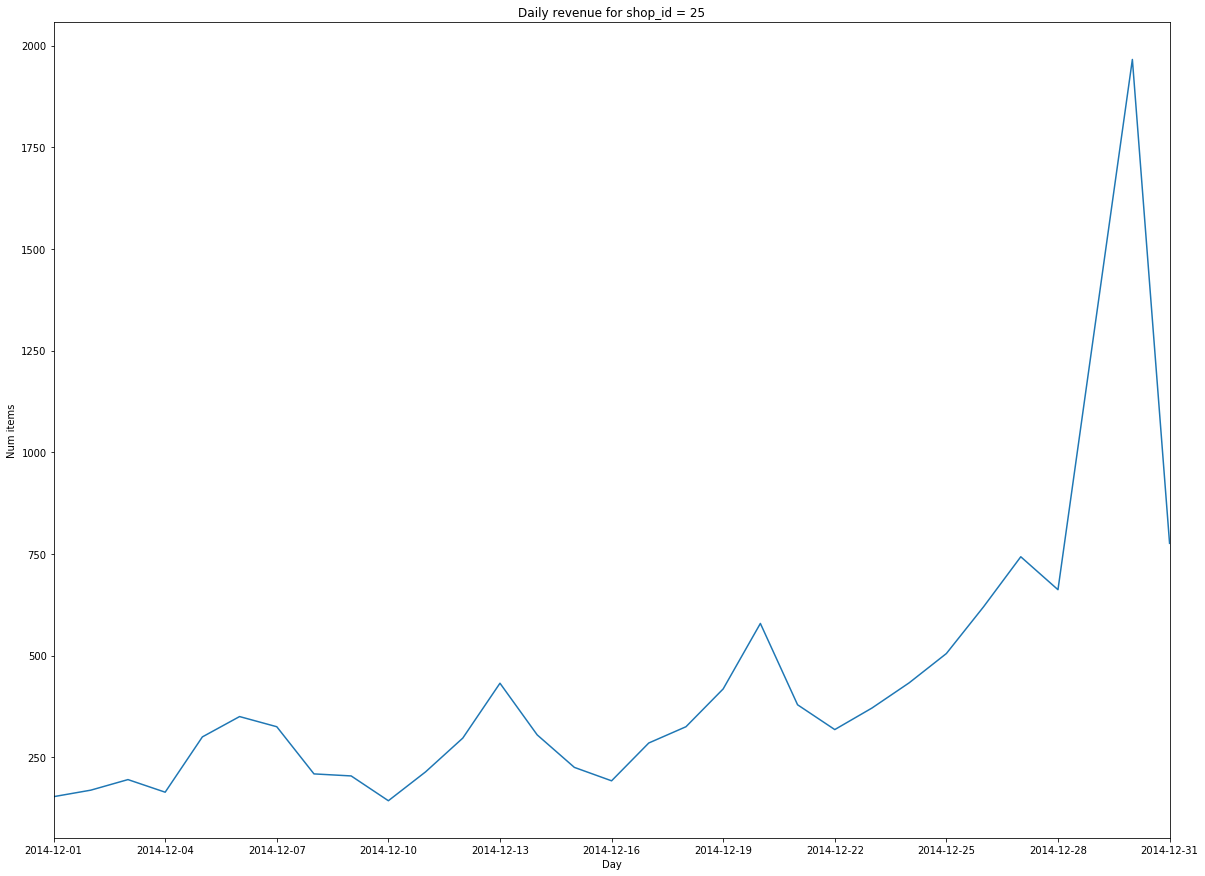

In [73]:
figure = pyplot.figure(figsize=(20, 15))
axe = figure.gca()
pyplot.plot(count_per_day.index, count_per_day.values)
pyplot.ylabel('Num items')
pyplot.xlabel('Day')
axe.set_xlim([count_per_day.index[0], count_per_day.index[-1]])
title = pyplot.title("Daily revenue for shop_id = 25")

In [74]:
# pandas uses 1/n-1 by default, numpy uses 1/n
total_num_items_sold_var = count_per_day.var()
print("Variance for items sold per day: {}".format(total_num_items_sold_var))

Variance for items sold per day: 117167.70229885059


# Pandas on HDFS

Pandas may process data stored in HDFS

>>> from distributed import Executor, hdfs, progress
>>> e = Executor('127.0.0.1:8786')
>>> e
<Executor: scheduler=127.0.0.1:8786 workers=64 threads=64>

>>> nyc2014 = hdfs.read_csv('/nyctaxi/2014/*.csv',
...               parse_dates=['pickup_datetime', 'dropoff_datetime'],
...               skipinitialspace=True)

>>> nyc2015 = hdfs.read_csv('/nyctaxi/2015/*.csv',
...               parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

>>> nyc2014, nyc2015 = e.persist([nyc2014, nyc2015])
>>> progress(nyc2014, nyc2015)